# Análise do data-set Gapminder

## Leitura de dados

Nesta seção faz-se a leitura e a preparação dos dados para seu posterior análise. Também se examinará os padrões que seguem os dados e quais destes contribui com uma maior informação. 


In [2]:
import pandas as pd

# Importando os dados como dataframe pandas
file_gapmider = r"datasets/Gapminder.csv"
data = pd.read_csv(file_gapmider, sep=";", error_bad_lines=False)

# Visualizando as 5 primeiras linhas
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# Mudando os nomes das colunas
new_names_col = ["Pais", "continente", "Ano", "Expectativa de vida", "Pop Total", "PIB"]
old_names_col = list(data.columns)
data = data.rename(columns = {old_names_col[i]: new_names_col[i] for i in range(len(new_names_col))})
data.head()

,Pais,continente,Ano,Expectativa de vida,Pop Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# Tipos de dados

data.dtypes

Pais                    object
continente              object
Ano                      int64
Expectativa de vida    float64
Pop Total                int64
PIB                    float64
dtype: object

In [5]:
# Resumo das estatistacas dos dados

data.describe()

,Ano,Expectativa de vida,Pop Total,PIB
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165877
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [6]:
countries_siple = data["Pais"].drop_duplicates()
# data.head()

In [7]:
# Explorando se falta  informação
nan_rows = data[data.isnull().T.any()]
nan_rows


,Pais,continente,Ano,Expectativa de vida,Pop Total,PIB
60,Armenia,NaN,1992,68.663,3378331,1442.937796
61,Armenia,NaN,1997,70.377,3059000,1791.347190
62,Armenia,NaN,2002,71.403,3013818,2692.304039
63,Armenia,NaN,2007,71.965,2971650,4942.543911
64,Aruba,NaN,1972,70.941,59461,4939.758007
...,...,...,...,...,...,...
3235,Vanuatu,NaN,1987,61.860,142207,3251.274545
3236,Vanuatu,NaN,1992,65.080,161399,3443.424460
3237,Vanuatu,NaN,1997,66.462,179428,3840.467248
3238,Vanuatu,NaN,2002,68.406,196178,3234.458141


In [8]:
# Numero de dados faltantes
len(nan_rows)

301

Examinando rapidamente os dados, vemos que os dados que faltam correspondem ao continente ao qual cada país pertence. As informações sobre os continentes são fáceis de encontrar, pois existem muitos bancos de dados com essas informações. Se cruzarmos os dados obteremos os dados que faltam.
Usando a base de dados: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

In [9]:
# importando dados de paises e continentes

data_countries = pd.read_excel(r"datasets/Countries_Continents.xlsx")
data_countries.head()


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Aland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [10]:
countries_continents = data_countries[["name", "region"]]
countries_continents = countries_continents.rename(columns ={"name":"Pais", "region":"continente"})
countries_continents.head(10)

,Pais,continente
0,Afghanistan,Asia
1,Aland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
5,Andorra,Europe
6,Angola,Africa
7,Anguilla,Americas
8,Antarctica,NaN
9,Antigua and Barbuda,Americas


Criando um dicionário com os países que cada continente possui

In [11]:
continents = list(countries_continents["continente"].drop_duplicates().dropna())
countries_full_name = list(countries_continents["Pais"])
dic_continent_coutries = {continents[i]: list(countries_continents[countries_continents["continente"] == j]["Pais"]) for i, j in enumerate(continents)}
print(dic_continent_coutries)

{'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'Hong Kong, China', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Macao, China', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palestine, State of', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen'], 'Europe': ['Aland Islands', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey', 'Holy See', '

Observando os dados, notamos que o nome de alguns países não corresponde à forma como está escrito em nosso banco de dados original. Por exemplo, no banco de dados “país e continentes” o País do Irã é escrito como Irán (Islamic Republic of), que difere do nome do nosso banco de dados (PIB de cada país) que é escrito apenas como Iran.

Para resolver este problema, vamos a cruzar os dados, das duas bases, independentemente da forma como os nomes dos países estão escritos.

In [12]:
for i in range(data.shape[0]):
    if str(data.iloc[i, 1]) == "nan":
        for j in list(dic_continent_coutries.keys()):
            if data.iloc[i, 0] in dic_continent_coutries[j]:               
                data.iloc[i, 1] = j
# dic_continent_coutries[j][dic_continent_coutries[j].index(data.iloc[i, 0])]

In [13]:
# Verificando se não existem valores NaN
number_nan = len(data[data.isnull().T.any()])
print(f"Numero de NaN: {number_nan}")

Numero de NaN: 0


In [14]:
data.head(10)

,Pais,continente,Ano,Expectativa de vida,Pop Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


## Analisando os dados

Nesta seção, analisaremos os dados e tentaremos ver se podemos identificar um padrão nos dados.
Primeiro podemos analisar o PIB do último apresentado na coluna do ano

In [15]:
data_last_year = data[data["Ano"] == max(data["Ano"])]

Inspecione os dados graficamente

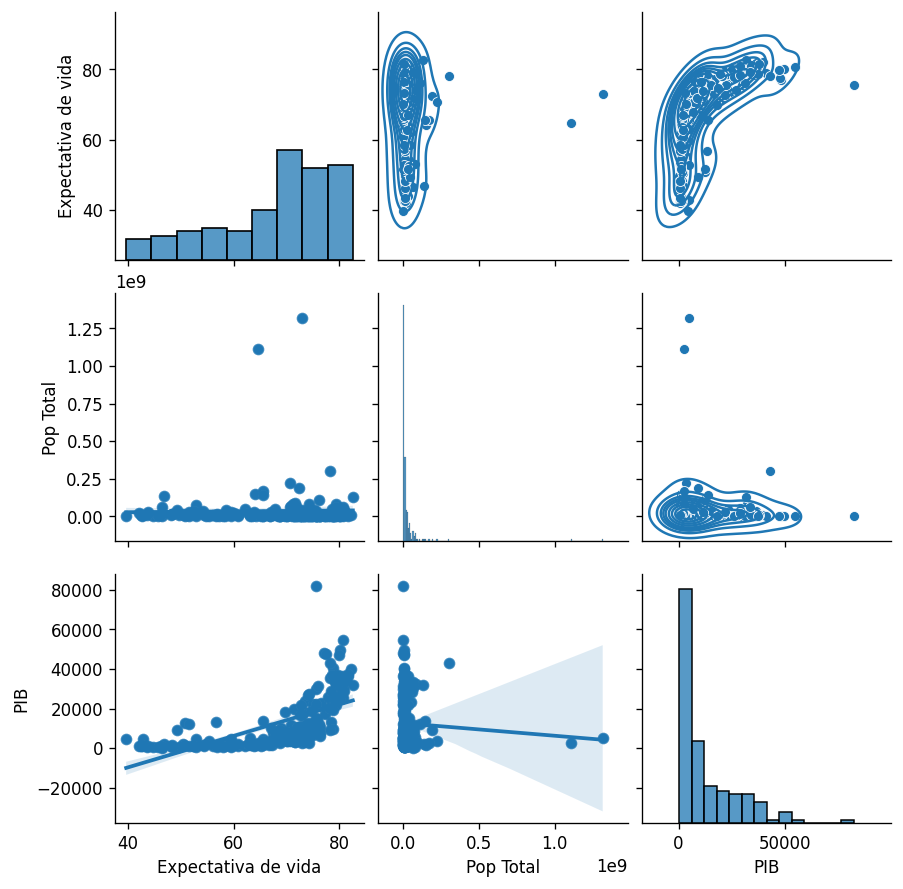

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

pp = sns.pairplot(data_last_year[['Expectativa de vida', 'Pop Total', 'PIB']])
pp = pp.map_lower(sns.regplot)
pp = pp.map_upper(sns.kdeplot);


Text(0.5, 0, 'PIB')

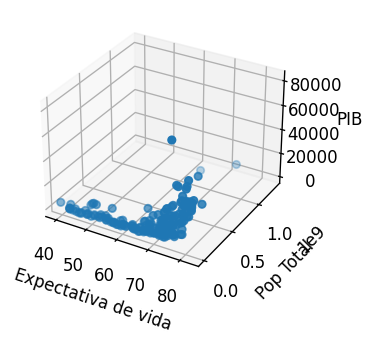

In [30]:
ax = plt.axes(projection='3d')
ax.scatter3D(data_last_year['Expectativa de vida'], data_last_year['Pop Total'], data_last_year['PIB'], 'gray')
ax.set_xlabel('Expectativa de vida')
ax.set_ylabel('Pop Total')
ax.set_zlabel('PIB')

Vemos que o gráfico “PIB” vs. “expectativa de vida” segue uma tendência, onde países com alto PIB têm alta expectativa de vida. Verifica-se também que existe um agrupamento dos dados na figura “Pop Total” vs. “PIB” onde apenas 4 países estão longe dessa tendência de agrupamento.

PIB por país em 2007

In [18]:
data_bar_plot = data_last_year[["Pais", "PIB"]]
data_bar_plot.iloc[:,1] = data_bar_plot.iloc[:,1].div(data_bar_plot.iloc[:,1].sum()).mul(100)

C:\Users\wilme\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [19]:
import numpy as np

porcent = data_bar_plot.iloc[:,1].round(2).astype(str).add('%') 
labels = [data_bar_plot.iloc[i,0] + ' ' + porcent.iloc[i] for i in range(len(porcent))]
values = data_bar_plot.iloc[:,1].round(2)


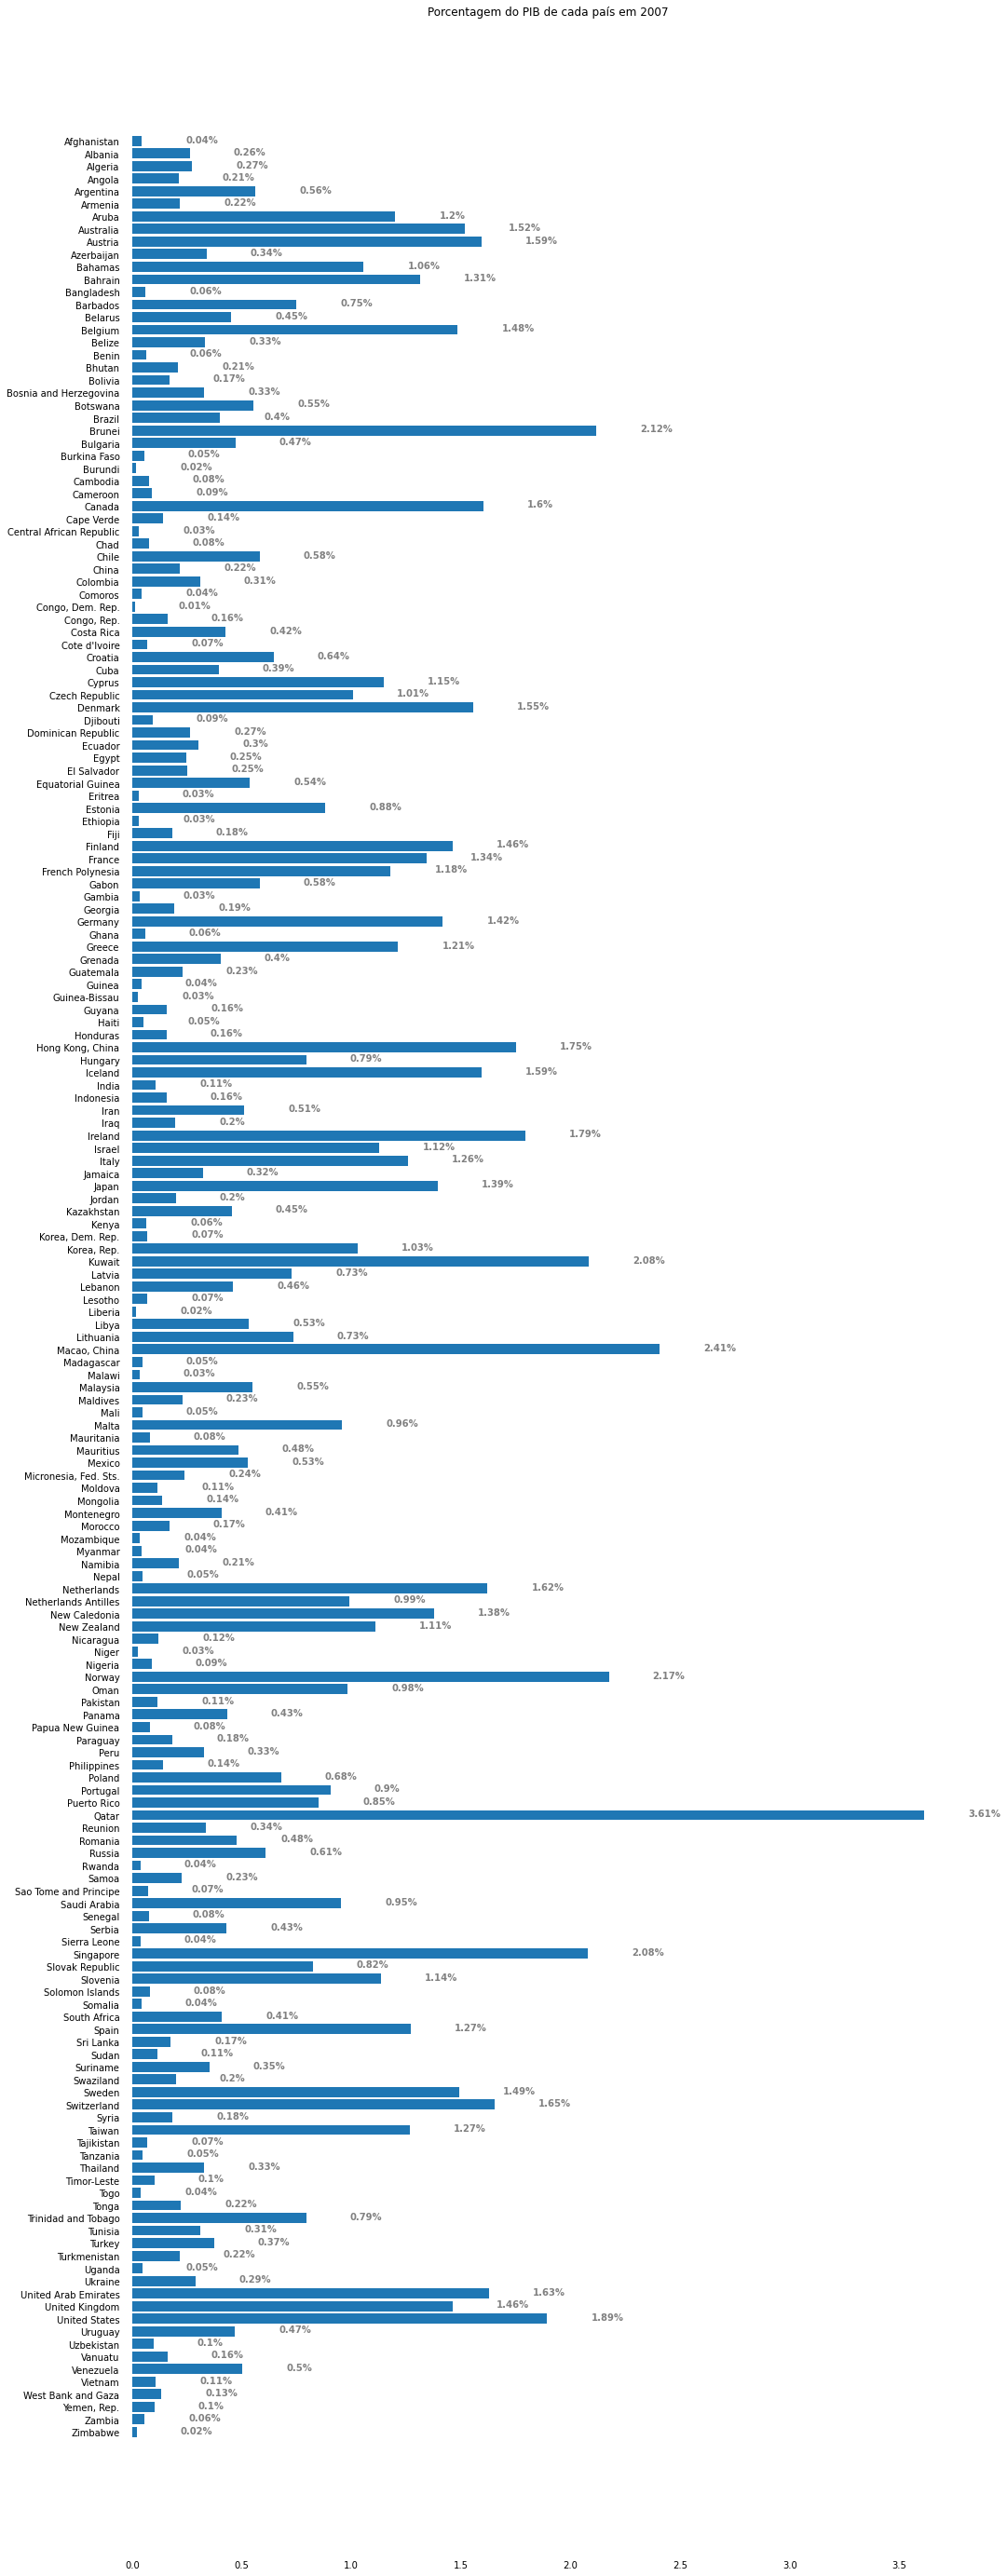

In [20]:

def plot_PIB(data_bar_plot):
    fig, ax = plt.subplots(figsize =(16, 50))
    

    ax.barh(data_bar_plot["Pais"], data_bar_plot["PIB"] )

    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    

    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    

    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    # Show top values
    ax.invert_yaxis()
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                str(round((i.get_width()), 2))+"%",
                fontsize = 10, fontweight ='bold',
                color ='grey')

    ax.set_title('Porcentagem do PIB de cada país em 2007')

    plt.show()
plot_PIB(data_bar_plot)

É possível ordenar a porcentagem do PIB do maior para o menor

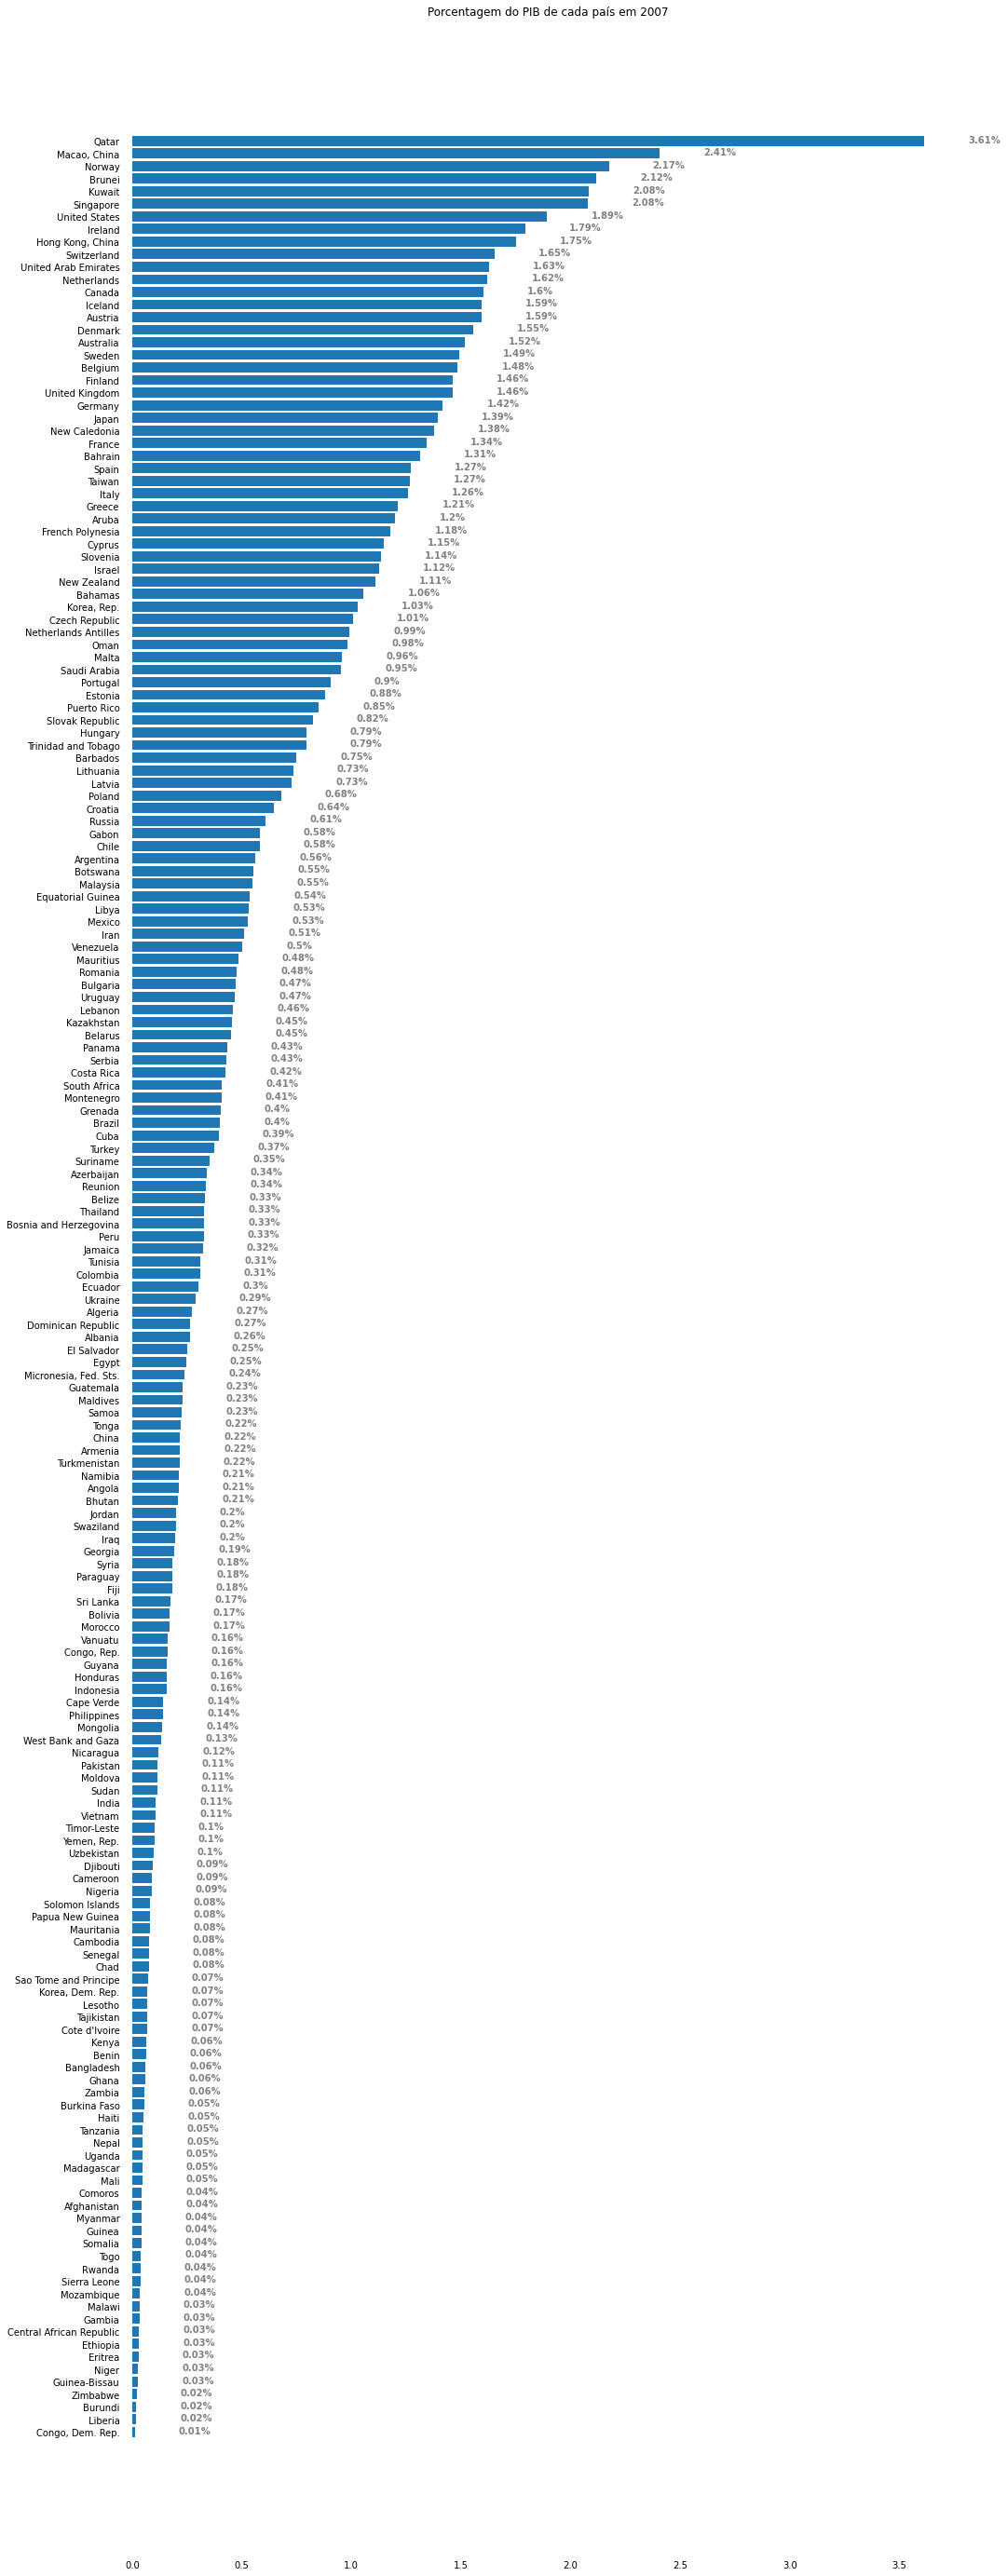

In [21]:
data_bar_plot_s = data_bar_plot.sort_values('PIB',ascending=False)
plot_PIB(data_bar_plot_s)

Um dado interessante de se analisar é a expectativa de vida média global ao longo dos anos

Text(0, 0.5, 'Expectativa de vida media [anos]')

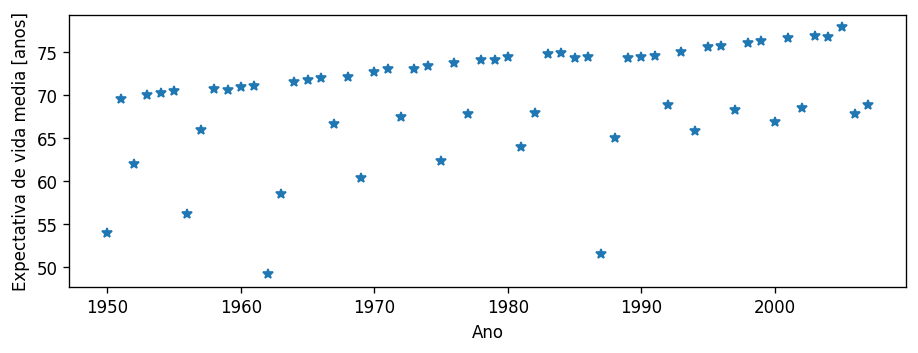

In [27]:
life_expct = data.groupby("Ano")["Expectativa de vida"].mean()
plt.plot(data["Ano"].unique(), list(life_expct), '*')
plt.xlabel("Ano")
plt.ylabel("Expectativa de vida media [anos]")

Apesar das flutuações nos dados, podemos ver que a expectativa média de vida aumenta com o passar dos anos.

Text(0.5, 1.0, 'Evolução da expectativa de vida no Brasil')

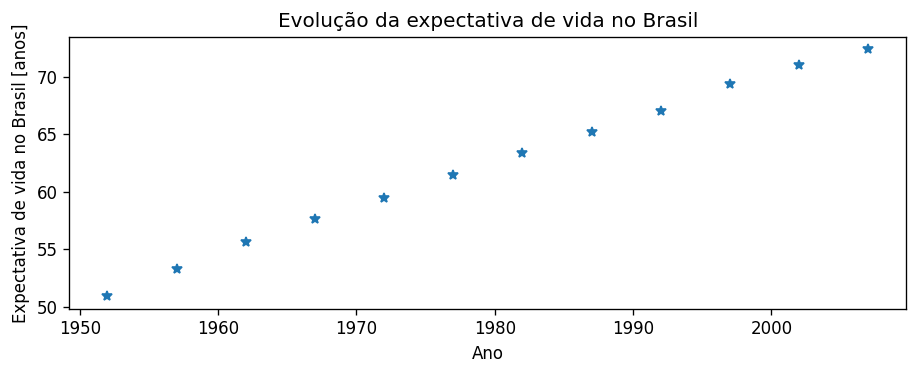

In [28]:
# Expectativa de vida do Brasil
life_expct_br = data[data["Pais"] == "Brazil"]
plt.plot(life_expct_br["Ano"], life_expct_br["Expectativa de vida"], '*')
plt.xlabel("Ano")
plt.ylabel("Expectativa de vida no Brasil [anos]")
plt.title("Evolução da expectativa de vida no Brasil")

Vemos que a expectativa de vida no Brasil aumentou linearmente.
Podemos comparar o comportamento do aumento da esperança de vida com a evolução do PIB. Para comparar o comportamento dessas duas variáveis, os dados serão normalizados


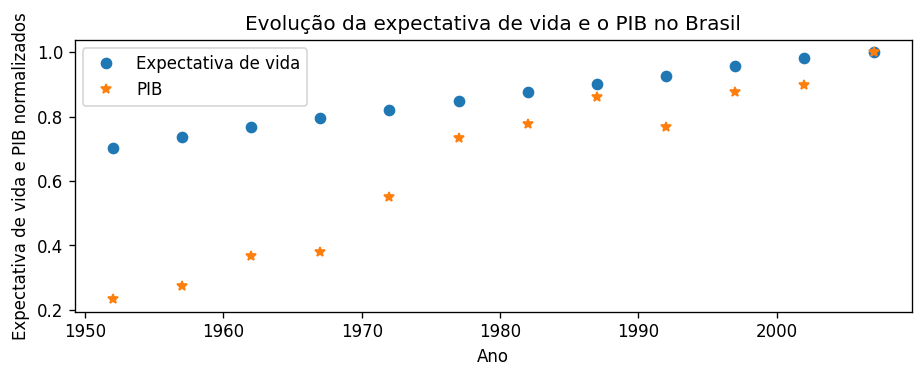

In [31]:
fig, ax = plt.subplots()
plt.plot(life_expct_br["Ano"], life_expct_br["Expectativa de vida"].div(life_expct_br["Expectativa de vida"].max()), 'o',
life_expct_br["Ano"], life_expct_br["PIB"].div(life_expct_br["PIB"].max()), '*')
plt.legend("Expectativa de vida")
plt.legend(("Expectativa de vida", "PIB"), loc='upper left' )

plt.xlabel("Ano")
plt.ylabel("Expectativa de vida e PIB normalizados")
plt.title("Evolução da expectativa de vida e o PIB no Brasil")
plt.show()

De acordo com o gráfico anterior, parece haver uma correlação entre o aumento da expectativa de vida e o PIB, essa correlação pode ser linear.

## Previsão de dados com o modelo ARIMA

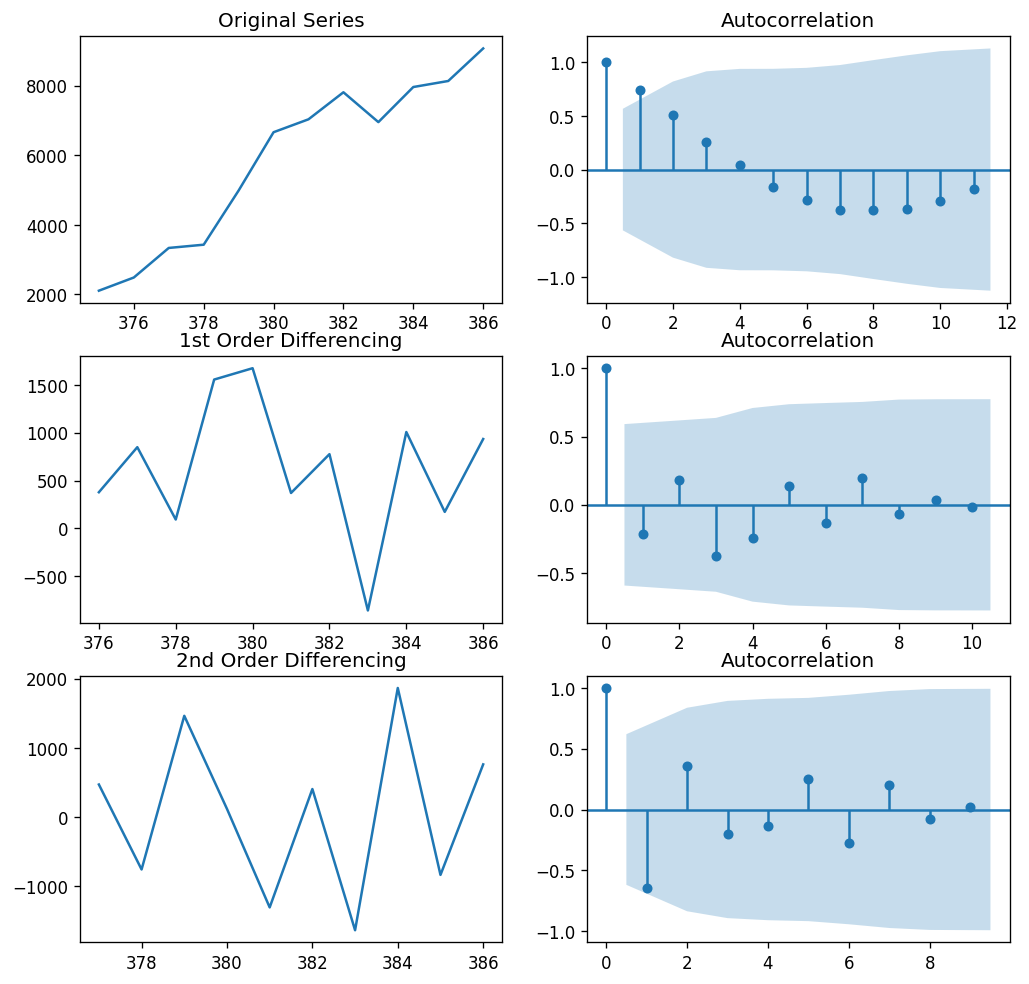

In [25]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':120})

pib = life_expct_br["PIB"]


fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(pib); axes[0, 0].set_title('Original Series')
plot_acf(pib, ax=axes[0, 1])

# 1st 
axes[1, 0].plot(pib.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(pib.diff().dropna(), ax=axes[1, 1])

# 2nd 
axes[2, 0].plot(pib.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(pib.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Identificando a oredem do modelo AR

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 10 must be < 5.

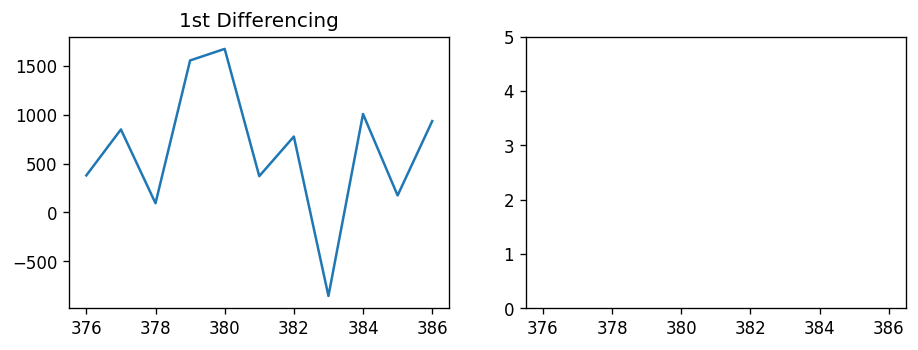

In [26]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(pib.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(pib.diff().dropna(), ax=axes[1])

plt.show()

Uma vez que não é possível obter a correlação devido à pequena quantidade de dados. Vamos escolher o modelo AR = 1

Ordem do modelo MA

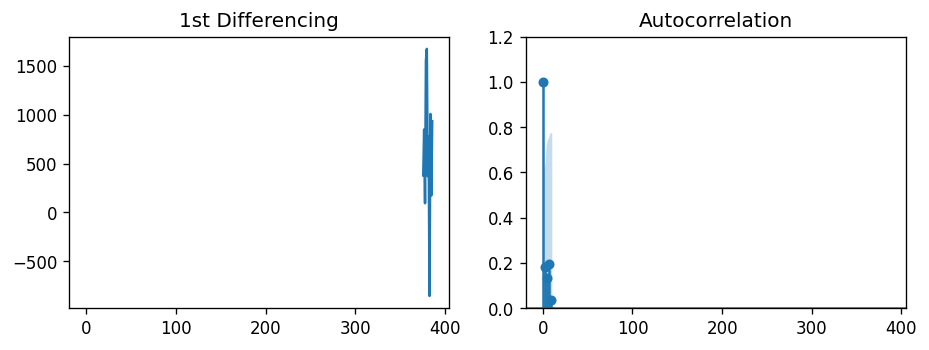

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(pib.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
#axes[1].set(xlim=(360,400))
plot_acf(pib.diff().dropna(), ax=axes[1])

plt.show()

Para o modelo MA escolhemos 1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(pib, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\wilme\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wilme\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provi

ValueError: The model specification cannot be estimated. The model contains 7 regressors (0 trend, 0 seasonal, 7 lags) but after adjustment for hold_back and creation of the lags, there are only 4 data points available to estimate parameters.

Lamentavelmente, como podemos ver na mensagem, não é possível encontrar o modelo ARIMA para esta série de dados, pois o número de dados é muito pequeno.